# Time-Series Evaluation & Forecasting

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas_datareader as pdr 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as ses ## for Single Exponential Smoothing
%matplotlib inline

In [6]:
# from jupyterthemes import jtplot
# jtplot.style(theme='chesterish')

## Get Data
We can get data source by different ways:
* By `.csv` file
* By `pandas_datareader`

In [15]:
## Import Time-Series from csv
ibm_data = pd.read_csv('00-Data/ibm.csv')
ibm_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-03,140.649994,140.940002,139.369995,139.570007,133.189392,1963200
1,2018-07-05,140.479996,141.429993,139.929993,141.429993,134.964371,3744700
2,2018-07-06,141.529999,142.940002,141.169998,142.479996,135.966370,2849000
3,2018-07-09,142.589996,144.720001,142.470001,144.389999,137.789047,3904700
4,2018-07-10,144.509995,145.589996,144.259995,144.710007,138.094421,3777000


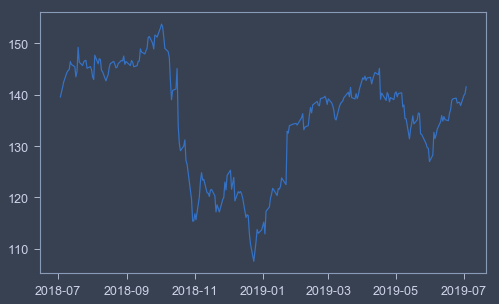

In [31]:
ts_ibm = ibm_data.Close
ts_ibm.index = pd.to_datetime(ibm_data.Date)
plt.plot(ts_ibm)
jtplot.style(ticks=True, grid=False, figsize=(10, 6));

In [34]:
## Get data by pandas_reader
gld_df = pdr.get_data_yahoo('GLD', start='2018-07-01')
gld_df = gld_df.drop(['Adj Close'], axis=1) ## Drop the column
gld_df = round(gld_df, 2)
gld_df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2018-07-02,118.21,117.40,118.18,117.46,12021900
2018-07-03,119.08,118.38,118.41,118.65,8901000
2018-07-05,119.33,118.77,118.92,119.05,4951900
2018-07-06,119.03,118.73,118.97,118.86,2946900
2018-07-09,119.73,119.14,119.65,119.15,4074900


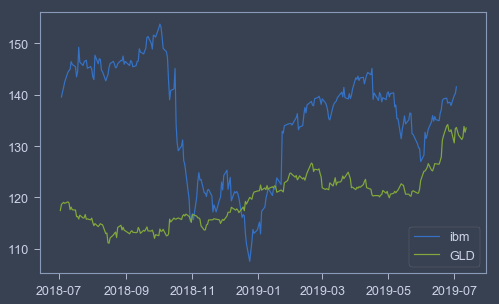

In [49]:
## Compare two time-series by graphics
ts_gld = gld_df.Close
plt.plot(ts_ibm, label = 'ibm')
plt.plot(ts_gld, label = 'GLD')
plt.legend(loc=4);

## Manipulate Time-series
* Aggregate by frequencies
* Take the lag

In [63]:
gld_df = pdr.get_data_yahoo('GLD', start='2013-01-01')
gld_df = round(gld_df, 2)
## Aggregate by Month
gld_df.index = pd.DatetimeIndex(gld_df.index)
monthly = gld_df.resample('BM').last() ## resample is an aggregate operation, take BM: Business Month
monthly.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-31,161.81,160.47,161.62,161.20,9334000,161.20
2013-02-28,154.16,152.39,154.09,153.00,14864400,153.00
2013-03-29,154.80,154.22,154.50,154.45,6851200,154.45
2013-04-30,142.83,141.55,142.27,142.77,11284400,142.77
2013-05-31,136.05,133.89,135.71,133.92,9726600,133.92


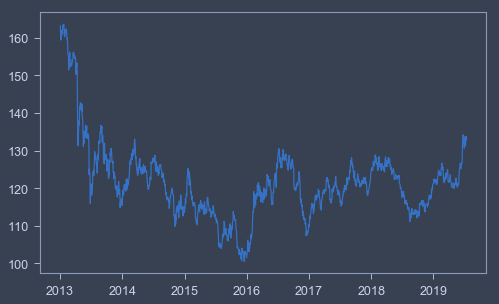

In [67]:
plt.plot(gld_df.Close);

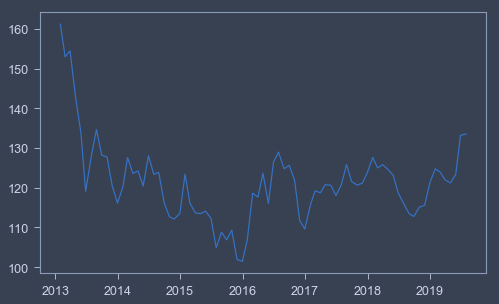

In [64]:
plt.plot(monthly.Close); ## after aggregating by month, we have something less noisy

In [68]:
## Generate a variable with the degree of lag
gld_df['Change'] = gld_df['Close'] - gld_df['Close'].shift()
gld_df.head()

,High,Low,Open,Close,Volume,Adj Close,Change
Date,,,,,,,
2013-01-02,164.14,163.14,163.49,163.17,10431800,163.17,NaN
2013-01-03,162.88,160.83,162.48,161.20,16117500,161.20,-1.97
2013-01-04,160.63,158.89,159.52,160.44,19179800,160.44,-0.76
2013-01-07,159.96,159.15,159.36,159.43,9361800,159.43,-1.01
2013-01-08,160.99,160.01,160.46,160.56,7694800,160.56,1.13


In [69]:
gld_df['LN_change'] = np.log(gld_df['Close']/gld_df['Close'].shift())
gld_df.head()

,High,Low,Open,Close,Volume,Adj Close,Change,LN_change
Date,,,,,,,,
2013-01-02,164.14,163.14,163.49,163.17,10431800,163.17,NaN,NaN
2013-01-03,162.88,160.83,162.48,161.20,16117500,161.20,-1.97,-0.012147
2013-01-04,160.63,158.89,159.52,160.44,19179800,160.44,-0.76,-0.004726
2013-01-07,159.96,159.15,159.36,159.43,9361800,159.43,-1.01,-0.006315
2013-01-08,160.99,160.01,160.46,160.56,7694800,160.56,1.13,0.007063


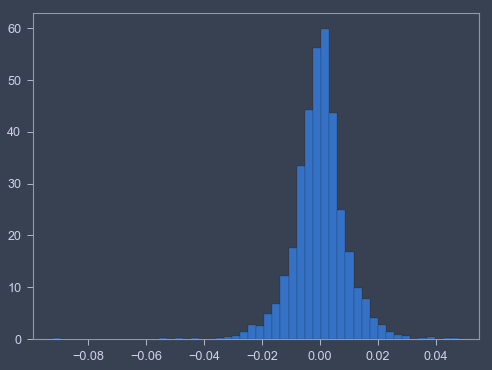

In [70]:
plt.figure(figsize=(8,6))
plt.hist(gld_df['LN_change'][1:], bins=50, edgecolor='black',density=True);

In [79]:
## Daily Volatility: Looking at the ln_change std of previous month
gld_df['Daily Vol'] = gld_df['LN_change'].rolling(21).std().shift() ## rolling is another aggregator, taking the window of n periods
## Expected change of price
gld_df['Expect_Change'] = gld_df['LN_change'] * gld_df['Daily Vol']
## Clean up
gld_df = gld_df[22:]
gld_df.head()

,High,Low,Open,Close,Volume,Adj Close,Change,LN_change,Daily Vol,Expect_Change
Date,,,,,,,,,,
2013-06-11,133.51,132.24,132.31,133.25,7199300,133.25,-0.69,-0.005165,0.015264,-0.000079
2013-06-12,134.83,132.83,132.95,134.25,6550600,134.25,1.00,0.007477,0.015212,0.000114
2013-06-13,134.20,132.82,133.31,133.74,7161800,133.74,-0.51,-0.003806,0.015283,-0.000058
2013-06-14,134.60,133.88,134.00,134.43,4278700,134.43,0.69,0.005146,0.015277,0.000079
2013-06-17,134.06,133.52,133.89,133.77,4072300,133.77,-0.66,-0.004922,0.014477,-0.000071


## Moving Average Forecasting
This replies on the assumption that tomorrow would be very similar to today, so we could expect the value of tomorrow, by the average of k-period most recent window.
$$\hat{y}^{MA}_{t+1} = Avg^t_{t-k}(y_i)$$

In [105]:
def MA_forecast(df, window=5):
    df['MA_Close'] = df['Close'].rolling(window).mean().shift()
    ## Metrics of Errors
    MAD = np.mean(np.abs(df['MA_Close'] - df['Close']))
    MAPE = np.mean((np.abs(df['MA_Close'] - df['Close']))/df['Close'])
    MSE = MAD**2
    RMSE = np.sqrt(MSE)
    ## Summary Output
    error_summary = pd.Series({'MA window': window, 'MSE': MSE, 'RMSE': RMSE, 'MAPE': MAPE})
    return error_summary, df

In [106]:
## compare peformances
summary_out = []
for w in [1, 3, 5, 10, 15]:
    summary, out = MA_forecast(gld_df, w)
    summary_out.append(summary)
summary_out = pd.DataFrame(summary_out)
summary_out

,MA window,MSE,RMSE,MAPE
0,1.0,0.579984,0.761567,0.006370
1,3.0,0.911135,0.954534,0.007975
2,5.0,1.353979,1.163606,0.009723
3,10.0,2.518554,1.586995,0.013284
4,15.0,3.564309,1.887938,0.015826


In [113]:
## compare for ibm
ibm_df = pdr.get_data_yahoo('IBM', start='2013-01-01')
ibm_df = round(gld_df, 2)
summary_out = []
for w in [1, 3, 5, 10, 15]:
    summary, out = MA_forecast(ibm_df, w)
    summary_out.append(summary)
summary_out = pd.DataFrame(summary_out)
summary_out

,MA window,MSE,RMSE,MAPE
0,1.0,0.579984,0.761567,0.006370
1,3.0,0.911135,0.954534,0.007975
2,5.0,1.353979,1.163606,0.009723
3,10.0,2.518554,1.586995,0.013284
4,15.0,3.564309,1.887938,0.015826


In [116]:
## Graphs to compare
summary, gld_ma_forecast = MA_forecast(gld_df,window=30) 
summary

MA window    30.000000
MSE           6.377126
RMSE          2.525297
MAPE          0.021191
dtype: float64

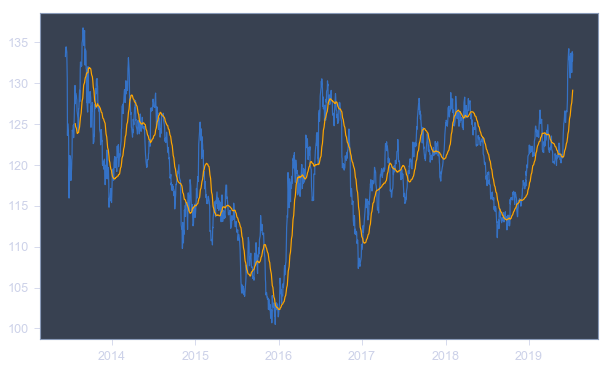

In [122]:
plt.figure(figsize=(10,6))
plt.plot(gld_ma_forecast.Close, label='Actual')
plt.plot(gld_ma_forecast.MA_Close, color='orange', label='MA Forecast');

## Single Exponential Smoothing
The idea is that the future forecast would be explained by the forecast for today, plus the difference between the observed and the forecast of today. 
$$F_{t+1} = (1-\alpha)F_t + \alpha A_{t} = F_t + \alpha(A_t - F_t)$$
* $F_{t+1}$ is the forecast at $t+1$
* $F_t$ is the forecast at $t$
* $A_t$ is the observed value at $t$
* $\alpha$ is the constant between 0 and 1, **smoothing constant**
If the impact of noise is small, $\alpha$ would be closer to 0.

In [126]:
gld_df = pdr.get_data_yahoo('GLD', start='2013-01-01')
gld_week = gld_df.resample('W').last()
gld_week.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-16,127.629997,126.260002,127.209999,126.559998,9226100,126.559998
2019-06-23,132.169998,131.070007,131.770004,131.979996,15068000,131.979996
2019-06-30,133.339996,132.610001,133.050003,133.199997,8077000,133.199997
2019-07-07,132.320007,130.809998,131.460007,132.139999,11536600,132.139999
2019-07-14,133.690002,132.529999,132.889999,133.529999,6308600,133.529999


In [127]:
## Simple Exponential Smoothing model
model = ses(gld_week['Close'])
model_fit = model.fit()
model_fit.predict()

/Users/anh.dang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:427: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self._index[-1] + 1
/Users/anh.dang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
/Users/anh.dang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


2019-07-21    133.529999
Freq: W-SUN, dtype: float64

In [138]:
## SES parameters
model_fit.params ## alpha = 1

{'smoothing_level': 1.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 160.44000244140625,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

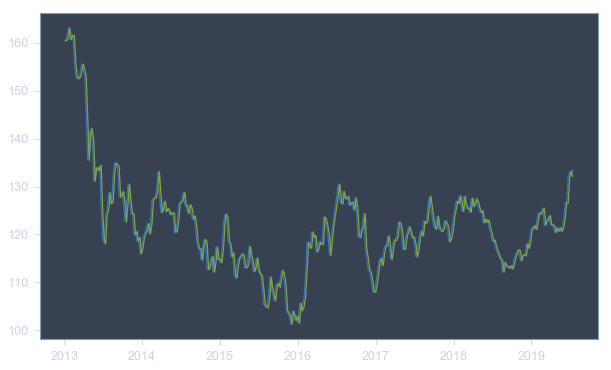

In [133]:
y_hat = model_fit.fittedvalues
plt.figure(figsize=(10,6))
plt.plot(gld_week['Close'], label='Actual')
plt.plot(y_hat, label='Simple Exponential Smoothing')

In [137]:
pd.DataFrame({'Actual': gld_week['Close'], 'Predict': y_hat}).head(10)

,Actual,Predict
Date,,
2013-01-06,160.440002,160.440002
2013-01-13,161.059998,160.440002
2013-01-20,163.089996,161.059998
2013-01-27,160.649994,163.089996
2013-02-03,161.449997,160.649994
2013-02-10,161.570007,161.449997
2013-02-17,155.759995,161.570007
2013-02-24,152.970001,155.759995
2013-03-03,152.440002,152.970001


In [147]:
## Let's see how it works
alpha_values = pd.DataFrame({'alpha': np.zeros(15), 'MSE': np.zeros(15)})
alpha = 0.1
for i in range(15):
    model = ses(gld_week['Close'])
    gld_week['Forecast'] = model.fit(alpha).fittedvalues
    gld_week['MSE'] = (gld_week['Close'] - gld_week['Forecast'])**2
    alpha_values['alpha'][i] = alpha
    alpha_values['MSE'][i] = gld_week['MSE'].mean() 
    alpha += 0.1 
alpha_values

,alpha,MSE
0,0.1,28.088795
1,0.2,15.993624
2,0.3,11.553271
3,0.4,9.332848
4,0.5,8.036416
5,0.6,7.204227
6,0.7,6.637633
7,0.8,6.240879
8,0.9,5.965184
9,1.0,5.786173


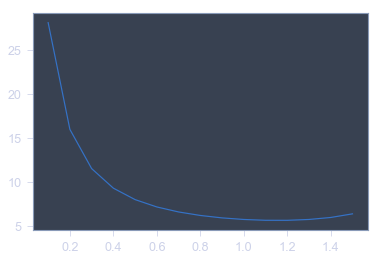

In [148]:
plt.plot(alpha_values.alpha, alpha_values.MSE) ## visually, we see the gain is flat from alpha - 1

# Simple Trading System with Moving Average Signals
How we use the time-series forecasting, to signal when to buy/sell a security. 
The buy-sell depends on the relative position of short-window MA, and long-window MA. We would expect that even short-window is noisy, it would convert to the long-window movements. Then: 
* When short is above long, we expect the price would decrease -> Should `SELL` now -> `Position = -1` 
* When short is below long, we expect the price would increase -> Should `BUY` now -> `Position = +1`
* Earnings: `Position * Change`, if `Position = -1, Change < 0 (price decrease)` -> beneficial. And, vice versa.

In [2]:
## get data
gld = pdr.get_data_yahoo('GLD', start='2013-01-01')
gld.drop('Adj Close', axis=1, inplace=True) 

In [4]:
## Different short-window and long-window
gld['9-day'] = gld['Close'].rolling(9).mean()
gld['21-day'] = gld['Close'].rolling(21).mean()
gld['Change'] = np.log(gld['Close']/gld['Close'].shift())
gld.tail()

,High,Low,Open,Close,Volume,9-day,21-day,Change
Date,,,,,,,,
2019-07-09,132.100006,131.160004,131.429993,131.750000,6633400,132.427777,130.193809,0.003498
2019-07-10,133.869995,132.350006,132.940002,133.830002,13920600,132.523332,130.598571,0.015664
2019-07-11,133.699997,132.410004,133.580002,132.699997,7535100,132.507777,130.956666,-0.008479
2019-07-12,133.690002,132.529999,132.889999,133.529999,6308600,132.544444,131.323333,0.006235
2019-07-15,133.460007,132.809998,133.179993,133.201996,1868441,132.831333,131.637713,-0.002459


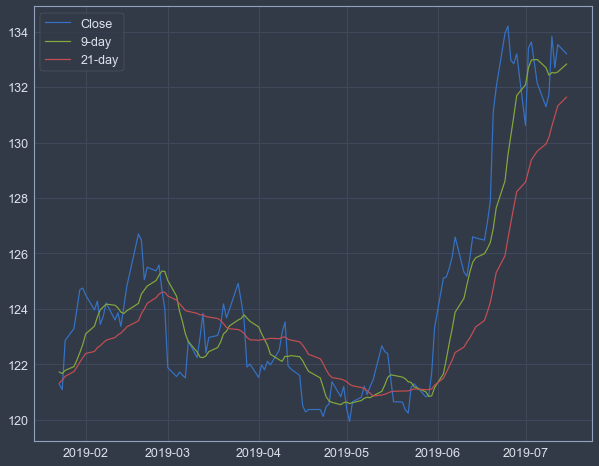

In [7]:
## plot to see
plt.figure(figsize=(10,8))
plt.plot(gld.Close[-120:])
plt.plot(gld['9-day'][-120:])
plt.plot(gld['21-day'][-120:])
plt.legend(loc=2)

In [15]:
## Trading Strategy
gld['position'] = np.where(gld['9-day'] < gld['21-day'], -1,0) ## Sell
gld['position'] = np.where(gld['9-day'] > gld['21-day'], 1, gld['Position']) ## Buy
gld[120:].head()

,High,Low,Open,Close,Volume,9-day,21-day,Change,Position,position
Date,,,,,,,,,,
2013-06-25,123.900002,122.879997,123.650002,123.470001,9369200,128.967779,132.293334,-0.003719,-1,-1
2013-06-26,119.900002,118.059998,119.879997,118.279999,24748800,127.250000,131.569047,-0.042944,-1,-1
2013-06-27,119.510002,115.650002,119.099998,115.940002,30001900,125.195557,130.669524,-0.019982,-1,-1
2013-06-28,119.330002,114.680000,115.220001,119.110001,32981900,123.566667,129.831905,0.026975,-1,-1
2013-07-01,121.949997,119.379997,119.940002,121.129997,15945200,122.344444,129.222857,0.016817,-1,-1


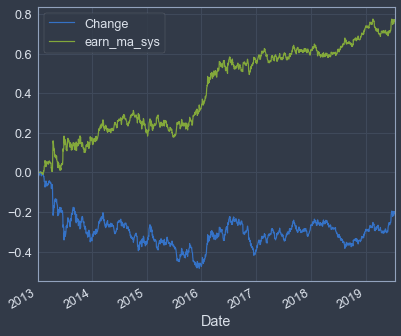

In [17]:
## Cumsum earnings
gld['earn_ma_sys'] = gld['Change'] * gld['position']
gld[['Change','earn_ma_sys']].cumsum().plot()